In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

Populating the interactive namespace from numpy and matplotlib


scales 0.506817594336 0.372831747012 0.290477223799
mu: ballantyne_logmu vs. est_logmu_ml_x (0.37754472720078275, 0.014952606477634724) 41


(<matplotlib.figure.Figure at 0x110f66590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110f66e10>)

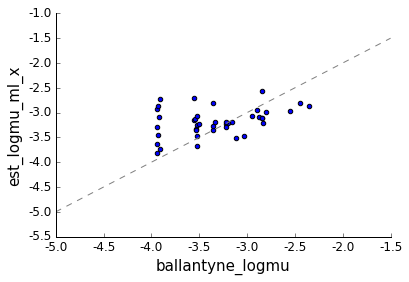

In [2]:
############### Using SMM ################
# Load YSTR data
ysgdp = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_sgdp_smm.tab"))
y1kg = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_1kg_smm.tab"))
y1kg["chrom"] = "Y"
truth = pd.read_csv(os.path.join("../analyses/ystr_validation/ystrs_literature_mutrates.tab"), sep="\t")

# Merge
data = pd.merge(ysgdp, truth, on=["chrom","start","end"], how="outer")
data = pd.merge(data, y1kg, on=["chrom","start","end"])

# Scale to have same mean
kgscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["est_logmu_ml_y"]))
muteascale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["log10_sgdp_mu"]))
bscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["ballantyne_logmu"]))
data["est_logmu_ml_y"] = data["est_logmu_ml_y"] + np.log10(kgscale)
data["log10_sgdp_mu"] = data["log10_sgdp_mu"] + np.log10(muteascale)
data["ballantyne_logmu"] = data["ballantyne_logmu"] + np.log10(bscale)
print "scales", kgscale, muteascale, bscale

# Columns:
# est_logmu_ml_x: sgdp
# est_logmu_ml_y: 1kg
# log10_sgdp_mu: from thomas
CompareMu(data, "ballantyne_logmu", "est_logmu_ml_x", figname=os.path.join(PLOTDIR, "SuppfigX_smm.pdf"))

scales 0.648500299811 0.52289566619 0.407393637127
mu: ballantyne_logmu vs. est_logmu_ml_x (0.77915742280551759, 1.968690460711811e-09) 41


(<matplotlib.figure.Figure at 0x110f5c590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x110f66bd0>)

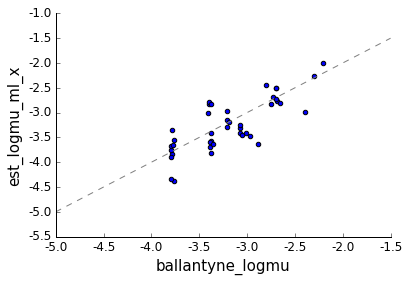

In [3]:
############### Using OU ################
# Load YSTR data
ysgdp = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_sgdp_ml.tab"))
y1kg = LoadMLData(os.path.join(DATAPATH, "ystr_validation", "ystrs_1kg_ml.tab"))
y1kg["chrom"] = "Y"
truth = pd.read_csv(os.path.join("../analyses/ystr_validation/ystrs_literature_mutrates.tab"), sep="\t")

# Merge
data = pd.merge(ysgdp, truth, on=["chrom","start","end"], how="outer")
data = pd.merge(data, y1kg, on=["chrom","start","end"])

# Scale to have same mean
kgscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["est_logmu_ml_y"]))
muteascale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["log10_sgdp_mu"]))
bscale = np.mean(10**(data["est_logmu_ml_x"]))/np.mean(10**(data["ballantyne_logmu"]))
data["est_logmu_ml_y"] = data["est_logmu_ml_y"] + np.log10(kgscale)
data["log10_sgdp_mu"] = data["log10_sgdp_mu"] + np.log10(muteascale)
data["ballantyne_logmu"] = data["ballantyne_logmu"] + np.log10(bscale)
print "scales", kgscale, muteascale, bscale

# Columns:
# est_logmu_ml_x: sgdp
# est_logmu_ml_y: 1kg
# log10_sgdp_mu: from thomas
CompareMu(data, "ballantyne_logmu",  "est_logmu_ml_x", figname=os.path.join(PLOTDIR, "SuppfigX_ou.pdf"))